In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/concrete-compressive-strength-uci/Concrete_Data.csv


# A. Preface

In this project, we will analyse a concrete data set which consists of
material compositions as features and the concrete strength data.
First we will analyse the relation of the features as well as the
realation between each feature with the strength.
Then we will build a machine learning model to predict the strength
of given concrete compositions.

# B. Data Set Up

In [2]:
data_path = "../input/concrete-compressive-strength-uci/Concrete_Data.csv"
concrete_df = pd.read_csv(data_path)

In [3]:
# Data Overview
print("The first 10 rows of the data:")
concrete_df.head(10)

The first 10 rows of the data:


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
# The shape of the data
print(f"The number of rows of the data = {concrete_df.shape[0]}")
print(f"The number of columns of the data = {concrete_df.shape[1]}")

The number of rows of the data = 1030
The number of columns of the data = 9


In [5]:
# Since the name of the columns are complicated in the original data set as we see
# above, we will change the name of the columns for convenience.
new_columns = ["cement",
               "blast_furnace_slag",
               "fly_ash",
               "water",
               "superplasticizer",
               "coarse_aggregate",
               "fine_aggregate",
               "age",
               "concrete_strength"]
conc_df = concrete_df.copy()
conc_df.columns = new_columns

print("The first 10 rows of the data with new columns names:")
conc_df.head(10)

The first 10 rows of the data with new columns names:


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


# C. Exploratory Data Analysis

## C1. General Information

In [6]:
# Checking the existence of missing values
print("Existence of missing values on each columns:")
conc_df.isnull().any()

Existence of missing values on each columns:


cement                False
blast_furnace_slag    False
fly_ash               False
water                 False
superplasticizer      False
coarse_aggregate      False
fine_aggregate        False
age                   False
concrete_strength     False
dtype: bool

In [7]:
# General information about the data
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   concrete_strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# Statistics Descriptive

# Since all the columns are of numeric data type,
# we do not need to perform numeric transformation
# to the dataframe.
# The statsitics descriptive of the data is given
# as follows:
print("Statistics descpritive of the data:")
conc_df.describe().T

Statistics descpritive of the data:


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## C2. Correlation

Now we will analyse the correlations in the data set. **Correlation** can be
intuitively thought of as the degree to which a pair of variables linearly
related. The formal mathematical description of correlation is given as folllows.

Let $(\Omega,\, \mathcal{F},\, P)$ be the probability space [1] corresponding
the data set. Let $\mathcal{R}(\Omega,\, \mathcal{F},\, P)$ be the set of all
random variables on $(\Omega,\, \mathcal{F},\, P)$. Then we have
$\mathcal{R}(\Omega,\, \mathcal{F},\, P) \subseteq \mathcal{L}^1(\Omega,\, \mathcal{F},\, P)$
[3]. *Expected value* [2] is a map $\mathrm{E}: \mathcal{R}(\Omega,\, \mathcal{F},\, P) \to \mathbb{R}$
defined by the Lebesgue integral [3]
$$
    \forall X \in \mathcal{R}(\Omega,\, \mathcal{F},\, P) \,,\;
    \mathrm{E}[X] := \int_\Omega X \,dP \,.
$$
*Covariance* [2] is a map
$\mathrm{cov}: \mathcal{R}(\Omega\,, \mathcal{F},\, P) \times \mathcal{R}(\Omega\,, \mathcal{F},\, P)
\to \mathbb{R}$ defined by
$$
    \forall X, Y \in \mathcal{R}(\Omega\,, \mathcal{F},\, P) \,,\;
    \mathrm{cov}(X, Y) := \mathrm{E}[ (X - \mathrm{E}[X]) \, (Y - \mathrm{E}[Y]) \,.
$$
Now let $U, V \in \mathcal{R}(\Omega,\, \mathcal{F},\, P)$. Let $A, B, C \in \mathbb{R}$
such that
$$
    \mathrm{E}[U] = \int_\Omega U \,dP := A \,,
$$
$$
    \mathrm{E}[V] = \int_\Omega V \,dP := B \,,
$$
and
$$
    \mathrm{E}[UV] = \int_\Omega UV \,dP := C \,.
$$
Then from the definition of covariance and by the property of Lebesgue integrable functions [3],
we obtain

$$
\begin{split}
    \mathrm{cov}(U, V) &= \mathrm{E}\big[ (U - \mathrm{E}[U]) \, (V - \mathrm{E}[V]) \big]\\
                       &= \mathrm{E}\big[ UV - U\mathrm{E}[V] - \mathrm{E}[U]V
                           + \mathrm{E}[U]\mathrm{E}[V] \big] \\
                       &= \int_\Omega \left( UV - UB - AV + AB \right) \,dP \\
                       &= \int_\Omega UV \,dP - \int_\Omega UB \,dP - \int_\Omega AV \,dP
                           + \int_\Omega AB \,dP \\
                       &= \int_\Omega UV \,dP - B \int_\Omega U \,dP - A\int_\Omega V \,dP
                           + AB \int_\Omega \,dP \\
                       &= C - AB - AB + AB \cdot P(\Omega) \\
                       &= C - 2 AB + AB \\
                       &= C - AB \\
                       &= \mathrm{E}[UV] - \mathrm{E}[U]\mathrm{E}[V] \,.
\end{split}
$$

**Pearson correlation** is a map
$\mathrm{corr}: \mathcal{R}(\Omega,\, \mathcal{F},\, P) \times \mathcal{R}(\Omega,\, \mathcal{F},\, P)
\to \mathbb{R}$ defined by
$$
    \forall X, Y \in \mathcal{R}(\Omega,\, \mathcal{F},\, P) \,,\;
    \mathrm{corr}(X, Y) := \frac{\mathrm{cov}(X, Y)}{\sqrt{\mathrm{cov}(X, X) \, \mathrm{cov}(Y, Y)}}
    \,,
$$
which can be expanded into

$$
\begin{split}
    \mathrm{corr}(X, Y)
    &= \frac{\mathrm{cov}(X, Y)}{\sqrt{\mathrm{cov}(X, X) \, \mathrm{cov}(Y, Y)}} \\
    &= \frac{ \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y] }{
        \sqrt{\big( \mathrm{E}[X^2] - \mathrm{E}[X]^2 \big)
        \big( \mathrm{E}[Y^2] - \mathrm{E}[Y]^2 \big)} } \\
    &= \frac{ \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y] }{
        \sqrt{ \mathrm{E}[X^2] \mathrm{E}[Y^2] - \mathrm{E}[X^2] \mathrm{E}[Y]^2
        - \mathrm{E}[X]^2 \mathrm{E}[Y^2] + \mathrm{E}[X]^2 \mathrm{E}[Y]^2 }
        } \,.
\end{split}
$$

for every $X, Y \in \mathcal{R}(\Omega,\, \mathcal{F},\, P)$.

For this project, we will make use of `pandas.DataFframe.corr` for correlation.
By default, the method uses Pearson correlation.

**References**

[1] Kolmogorov, A. N. (1950). "Foundations of the Probability Theory". New York: Chelsea.

[2] Movellan, Javier R. (2008). "Introduction to Probability Theory and Statistics". Author.

[3] Salamon, Dietmar A. (2016). "Measure and Integration". European Mathematical Society.

The correlation table of the data is given as follows.

In [9]:
# Correlation between features
features_corr = conc_df.corr()
features_corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


To have a better intuitive insights from the correlation table,
let us observe the visualisation as follows.

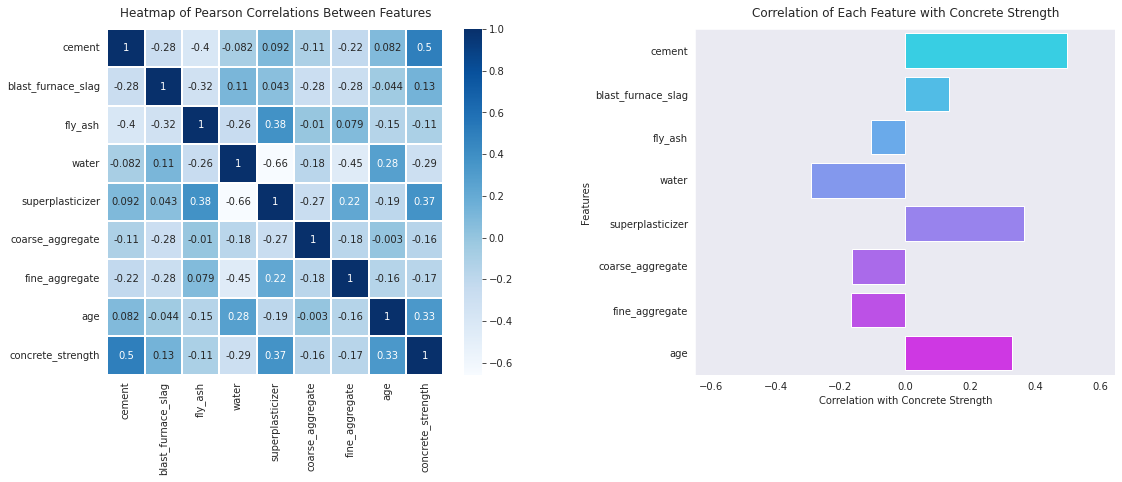

In [10]:
# Visualisation of the Correlations
sns.set_style("dark")
corr_fig = plt.figure(figsize= (2* 10, 1* 6))
corr_gs = corr_fig.add_gridspec(1, 2)
corr_ax = [[corr_fig.add_subplot(corr_gs[i, j])
            for j in range(2)] for i in range(1)]

# Heatmap representation of the correlation
# Heatmap
corr_00 = sns.heatmap(features_corr,
                      annot= True,
                      linewidth= 0.1,
                      cmap= "Blues",
                      ax= corr_ax[0][0])
hm_title_01 = "HEATMAP OF PEARSON CORRELATIONS BETWEEN FEATURES"
hm_title_02 = "Heatmap of Pearson Correlations Between Features"
corr_00.set_title(hm_title_02, pad= 12)

# Barplot
# The correlation of each features and concrete strength
cfcs_cod = features_corr["concrete_strength"][0:-1]
cfcs_dom = cfcs_cod.index

corr_01 = sns.barplot(x= cfcs_cod, y= cfcs_dom, palette= "cool",
                      ax= corr_ax[0][1])
corr_01.set_title("Correlation of Each Feature with Concrete Strength",
                  pad= 12)
corr_01.set(xlabel= "Correlation with Concrete Strength",
            ylabel= "Features",
            xlim= (-cfcs_cod.max() - 0.15, cfcs_cod.max() + 0.15)
           )

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

From the visualisation, we can see that the amount of cements positively correlated to
the concrete strength. In fact, it has the highest positive correlation with the
strength compared to the other features'. Superplasticizers also increase the strength,
and so does the age of the concrete. On the other hand, water, course aggregates, fine
aggregates and fly ash have negative correlations to the stength. This is understandable,
since as we increase the number of these materials within a concrete mixture, we must
decrease the number of cements. This is the consequence of the density equilibrium.

As we look closer, we also find that `water` and `superplasticizer` are negatively
correlated. In fact, the reason why engineers apply superplactiziers to a concrete
mixture is to increase the workability so that it allows for less water composition,
which again means increasing concrete strength (as we see that water is negatively
correlated with strength). It describes why `superplasticizer` and `concrete_strength`
are positively correlated.

## C3. Further Relations
Let us observe further relations between the features in the data.
Now that we know `cement`, `superplasticizer` and `age` have positive correlations with
`concrete_strength`, we will try to plot the relation between each of `cement`, `superplasticizer`
and `age` with `concrete_strength`.

In [11]:
class FurtherRelations:
    def __init__(self, df, strength):
        self.df = df
        self.strength = strength
        self.all_df = None
        
    def __sp_labeller(self):
        ndf = self.df
        sp_cat = []
        for sp in ndf["superplasticizer"]:
            low_b = 3* int(sp / 3)
            upp_b = low_b + 3
            sp_cat.append(f"[{str(low_b), {str(upp_b)}})")
        ndf["SP_cat"] = sp_cat
        self.df = ndf
        
    def weight(self):
        ndf = self.df
        df_idx_w = list(ndf.columns)[0: -1]
        ndf["weight"] = [ndf.loc[k, df_idx_w].sum()
                             for k in range(len(ndf))]
        self.df = ndf
        
    def generate_all(self):
        ndf = self.df.copy()
        ndf["concrete_strength"] = self.strength
        self.all_df = ndf
        
    def hist_cement_sp_age_all(self):
        sns.set_style("dark")
        fig = plt.figure(figsize= (3 *8, 6))
        gs = fig.add_gridspec(1, 3)
        ax = [[fig.add_subplot(gs[i, j]) for j in range(3)]
              for i in range(1)]
        
        cols = ["cement", "superplasticizer", "age"]
        col_titles = ["Cement Compositions",
                      "SP Compositions",
                      "Concrete Age"]
        ax_00, ax_01, ax_02 = None, None, None
        bin_widths = [25, 3, 15]
        axs = [ax_00, ax_01, ax_02]
        for k, col, col_title, ax_, bw in zip(range(3),
                                             cols,
                                             col_titles,
                                             axs,
                                             bin_widths):
            ax_ = sns.histplot(data= self.df[col],
                               binwidth= bw,
                               stat= "density",
                               kde= True,
                               ax= ax[0][k])
            ax_.set_title(f"Distribution of the {col_title}", pad= 15)
            ax_.set(xlabel= col_title + " (kg/m^3)",
                    ylabel= "Density")
        plt.show()
        
    def cement_dist_normal(self):
        used_df = self.df[(self.df["superplasticizer"] == 0)
                          & ((self.df["age"] == 28)
                             | (self.df["age"] ==  14))]["cement"]
        
        sns.set_style("dark")
        fig = plt.figure(figsize= (8, 6))
        fig = sns.histplot(data= used_df, binwidth= 25)
        fig.set_title(f"Dist. of Cement Comp. without Superplasticizer on Day 14 and 28 ({len(used_df)} Samples)",
                      pad= 12)
        fig.set(xlabel= "Cement Compositions (kg/m^3)", ylabel= "Count")
        plt.show()
        
    def dist_cement_mature(self):
        self.generate_all()
        df = self.all_df
        used_data = [
            df[(df["age"] == 28) & (df["superplasticizer"] < 10)],
            df[(df["age"] == 28) & (10 <= df["superplasticizer"])
               & (df["superplasticizer"] < 20)],
            df[(df["age"] == 28) & (df["superplasticizer"] >= 20)]
        ]
        titles = ["SP < 10", "10 ≤ SP < 20", "SP ≥ 20"]
        
        sns.set_style("dark")
        fig = plt.figure(figsize= (3 *8, 2 *6))
        gs = fig.add_gridspec(2, 3)
        ax = [[fig.add_subplot(gs[i, j]) for j in range(3)] for i in range(2)]
        ax_00, ax_01, ax_02, ax_10, ax_11, ax_12  = None, None, None, None, None, None
        
        axs_0 = [ax_00, ax_01, ax_02]
        for k, dat, ax_, tit in zip(range(3), used_data, axs_0, titles):
            ax_ = sns.histplot(data= dat["cement"],
                               stat= "density",
                               kde= True,
                               ax= ax[0][k])
            ax_.set_title(f"Dist. Cement Comp. with {tit} on Day 28", pad= 12)
            ax_.set(xlabel= "Cement Composition (kg/m^3)",
                    ylabel= "Density")
        
        axs_1 = [ax_10, ax_11, ax_12]
        for k, dat, ax_, tit in zip(range(3), used_data, axs_1, titles):
            ax_ = sns.regplot(x= dat["cement"],
                                  y= dat["concrete_strength"],
                                  ax= ax[1][k])
            ax_.set_title(f"Relation Between Cement Comp. & Strength ({tit})", pad= 12)
            ax_.set(xlabel= "Cement Composition (kg/m^3)",
                    ylabel= "Compressive Strength (MPa)")
            
        plt.subplots_adjust(hspace= 0.25)
        plt.show()
    
    def cement_strengh_relation(self):
        df = self.df.copy()
        sp_cat = []
        for sp in df["superplasticizer"]:
            if sp < 10:
                sp_cat.append(f"[0, 10)")
            elif 10 <= sp < 20:
                sp_cat.append(f"[10, 20)")
            else:
                sp_cat.append(f"[20, max sp]")
        df["sp_cat"] = sp_cat
        df["concrete_strength"] = self.strength
        ndf = df[(df["age"] == 28)]
        
        sns.set_style("dark")
        fig = plt.figure(figsize= (8, 6))
        fig = sns.regplot(x= "cement",
                          y= "concrete_strength",
                          data= ndf)
        fig.set_title("The Relation bertween Cement and Concrete Strength on Day 28",
                      pad= 12)
        fig.set(xlabel= "Cement Compositions (kg/m^3)",
                ylabel= "Concrete Compressive Strength (MPa)")
        plt.show()

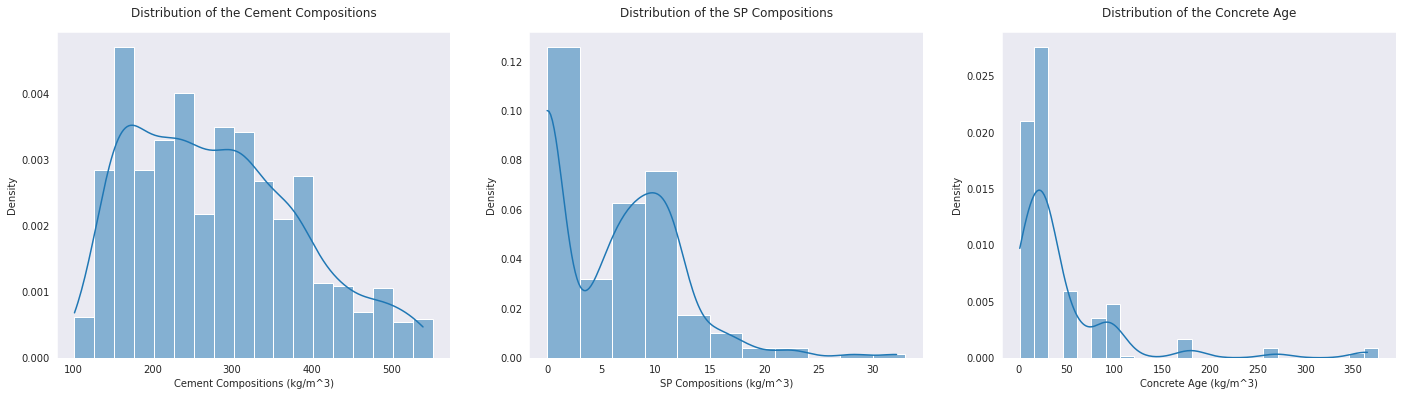

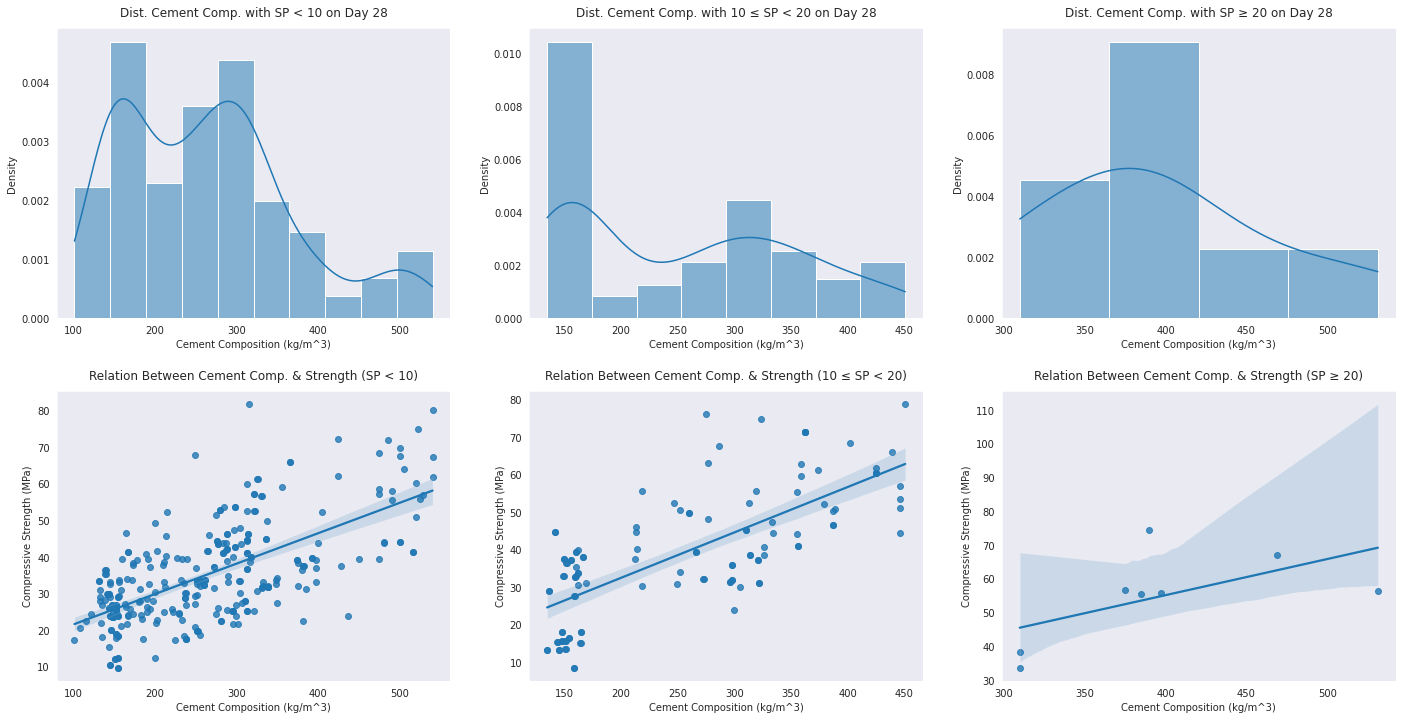

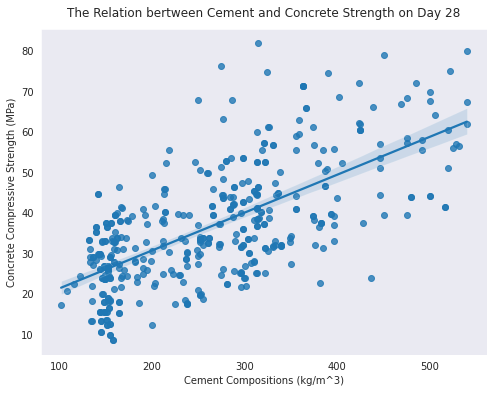

In [12]:
# Visualisations of the Relations
ft_df = conc_df.copy()
c_str = ft_df.concrete_strength
ft_df.drop(columns= ["concrete_strength"], inplace= True)

ft_relations = FurtherRelations(ft_df, c_str)
ft_relations.hist_cement_sp_age_all()
ft_relations.dist_cement_mature()
ft_relations.cement_strengh_relation()

# D. Machine Learning Model

Now we will build the machine learning (ML) model based on the knowledge
we know so far. The possible algorithms that we can use are
`LinearRegression`, `KNeighborsRegressor`, `RandomForestRegressor`,
and `XGBRegressor`. Then we will observe which one is the best model by
evaluating their mean absolute error (MAE) score.

## D1. Preprocessing

Normalisation probably improves the model performance, or probably
degrades either. However, we will evaluate the performance of the
model with or without normalisation. The normalisation that
we use is the `MinMaxScaler` from `sklearn.preprocessing`.

## D2. Learning Model

In [13]:
class ModelScorer:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __data_criterion(self):
        if isinstance(self.X, pd.core.frame.DataFrame) \
                and isinstance(self.y, pd.core.series.Series):
            return True
        else:
            return False
    
    def cv_single_score(self, model, normalise= False):
        from statistics import mean
        if self.__data_criterion():
            X, y = self.X, self.y
            if normalise == False:
                my_pipeline = Pipeline(
                    steps= [("model", model)]
                )
            else:
                my_pipeline = Pipeline(
                    steps= [("preprocessing", MinMaxScaler()),
                            ("model", model)]
                )
            mae_scores = -1 * cross_val_score(my_pipeline,
                                              X, y,
                                              cv= 5,
                                              scoring= "neg_mean_absolute_error")
            return mean(mae_scores)
    
    def cv_collective_score(self, models, model_index):
        """>>> 'models' and 'model_index' must have the same length."""
        X = self.X
        y = self.y
        scorer = self.cv_single_score
        cv_sc_dic = {"cv_model_no_scale": [scorer(model)
                                           for model in models],
                     "cv_model_scaled": [scorer(model, normalise= True)
                                         for model in models]}
        cv_sc_df = pd.DataFrame(cv_sc_dic, index= model_index)
        return cv_sc_df

In [14]:
# Model Evaluation
models = [LinearRegression(n_jobs= 6),
          KNeighborsRegressor(p= 1, n_jobs= 6),
          KNeighborsRegressor(p= 2, n_jobs= 6),
          RandomForestRegressor(n_estimators= 500, n_jobs= 6),
          XGBRegressor(n_estimators= 500, learning_rate= 0.01, n_jobs= 6)]
model_index = ["Linear_Regression",
               "KN_Regression_Taxicab",
               "KN_Regression_Euclidean",
               "Random_Forest_Regression",
               "XGB_Regression"]

X = conc_df.drop(columns= ["concrete_strength"])
y = conc_df.concrete_strength
model_eval = ModelScorer(X, y)
model_cv_sc_df = model_eval.cv_collective_score(models, model_index)

In [15]:
# Model Score DF
print("Model score based on the evaluation:")
model_cv_sc_df

Model score based on the evaluation:


,cv_model_no_scale,cv_model_scaled
Linear_Regression,8.925400,8.925400
KN_Regression_Taxicab,9.992311,9.795305
KN_Regression_Euclidean,10.328922,9.957386
Random_Forest_Regression,8.216517,8.258915
XGB_Regression,7.676457,7.678422


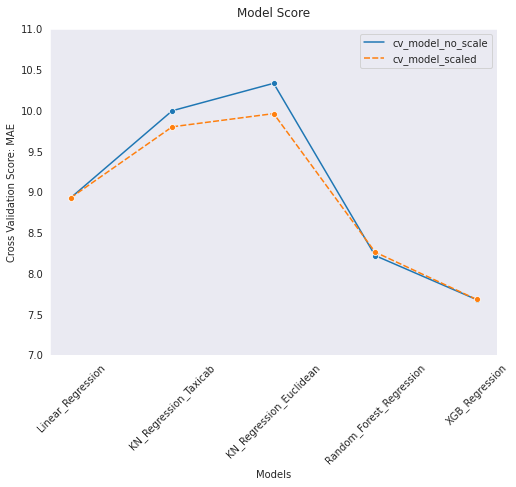

In [16]:
# Model Score Visualisation
sns.set_style("dark")
ms_fig = plt.figure(figsize= (8, 6))
ms_fig = sns.lineplot(data= model_cv_sc_df, marker= "o")
ms_fig.set_title("Model Score", pad= 12)
ms_fig.set(xlabel= "Models",
           ylabel= "Cross Validation Score: MAE",
           ylim= (7, 11))
plt.xticks(rotation= 45)
plt.show()

## D3. Model Optimisastion
Note that the best model gives the least MAE score.
From the model evaluation we can see that `XGB_Regression` outplays the other
models. However, the absolute error is still around 7.68. We wish to
decrease the absolute error even further. To achieve that, we will try
to seek the best `n_estimators` for the model.

In [17]:
pos_nest = [k for k in range(100, 1000, 100)]
mod_opt_dic = {"XGBR_no_scale": [model_eval.cv_single_score(
                   XGBRegressor(n_estimators= k,
                                learning_rate= 0.01,
                                n_jobs= 6))
                    for k in pos_nest],
               "XGBR_scaled": [model_eval.cv_single_score(
                   XGBRegressor(n_estimators= k,
                                learning_rate= 0.01,
                                n_jobs= 6),
                   normalise= True)
                    for k in pos_nest]}
mod_opt_df = pd.DataFrame(mod_opt_dic, index= pos_nest)

In [18]:
print("The Model MAE score based on the number of estimators:")
mod_opt_df

The Model MAE score based on the number of estimators:


,XGBR_no_scale,XGBR_scaled
100,14.519475,14.519475
200,9.179406,9.179312
300,7.981623,7.981477
400,7.734308,7.734343
500,7.676457,7.678422
600,7.665877,7.668333
700,7.672410,7.675082
800,7.655324,7.658113
900,7.635555,7.638607


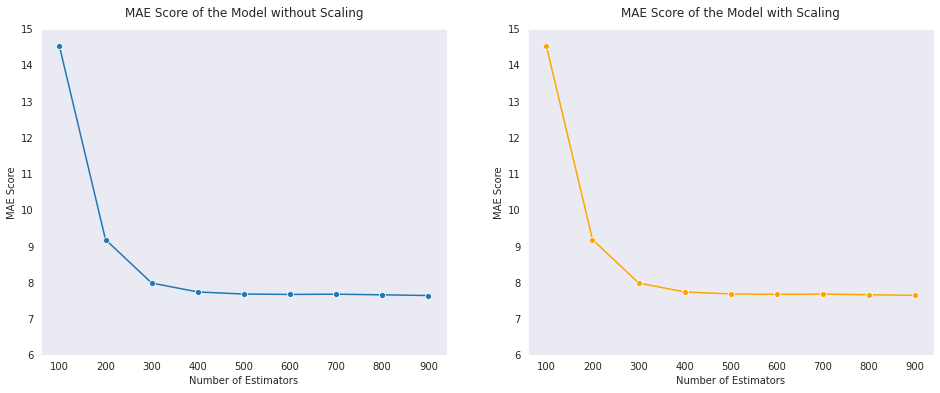

In [19]:
# Model MAE Score Visualisation
sns.set_style("dark")
xgb_fig = plt.figure(figsize= (2 *8, 6))
xgb_gs = xgb_fig.add_gridspec(1, 2)
xgb_ax = [[xgb_fig.add_subplot(xgb_gs[0, j]) for j in range(2)]]

xgb_ax_00 = sns.lineplot(data= mod_opt_df["XGBR_no_scale"],
                         marker= "o",
                         ax= xgb_ax[0][0])
xgb_ax_00.set_title("MAE Score of the Model without Scaling", pad= 12)
xgb_ax_00.set(xlabel= "Number of Estimators",
              ylabel= "MAE Score",
              ylim= (6, 15))

xgb_ax_01 = sns.lineplot(data= mod_opt_df["XGBR_scaled"],
                         marker= "o",
                         color= "orange",
                         ax= xgb_ax[0][1])
xgb_ax_01.set_title("MAE Score of the Model with Scaling", pad= 12)
xgb_ax_01.set(xlabel= "Number of Estimators",
              ylabel= "MAE Score",
              ylim= (6, 15))

plt.show()

The result shows that as we increase the number of estimators the model gives a better performance.
However, the improvement does not seem significant for the number of estimators greater than 300.
Therefore, it is wiser to pick an effective number of estimators. Therefore we pick 600.
On the other hand, normalisation gives a slightly worse performance on `XGBRegressor`, therefore
we will omit normalisation for the final model.

In [20]:
final_model = XGBRegressor(n_estimators= 500, learning_rate= 0.01, n_jobs= 6)
final_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [21]:
# Actual Data vs Prediction Comparison
final_df = conc_df.copy()
y_pred = final_model.predict(X)
final_df["predicted_strength"] = y_pred
final_df["act_min_pred"] = final_df["concrete_strength"] - final_df["predicted_strength"]

print("The data embedded with the predicted strength:")
final_df

The data embedded with the predicted strength:


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength,predicted_strength,act_min_pred
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,69.429703,10.560297
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,66.183052,-4.293052
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,40.877354,-0.607354
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,41.142242,-0.092242
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,43.520313,0.779687
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,43.641968,0.638032
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,32.982052,-1.802052
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,24.601425,-0.901425
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,32.760227,0.009773


The relations between actual and predicted strength are visualised as follows.

In [22]:
# Visualisation: Comparison between actual and predicted strength
def actual_prediction_comparison(df, act_col, pred_col, hue_cols,
                                 viz1_tit= "Actual Strength and Predicted Strength",
                                 viz1_xlabel= "Actual Strength (MPa)",
                                 viz1_ylabel= "Predicted Strengh (MPa)",
                                 viz2_tit= "Difference Between Actual and Prediction",
                                 viz2_xlabel= "Actual Strength (MPa)",
                                 viz2_ylabel= "Difference (MPa)"):
    n_row, n_col = len(hue_cols), 2
    fin_fig = plt.figure(figsize= (n_col* 8, n_row* 8))
    fin_gs = fin_fig.add_gridspec(n_row, n_col)
    fin_ax = [[fin_fig.add_subplot(fin_gs[i, j]) for j in range(n_col)]
              for i in range(n_row)]
    for nr, hc in zip(range(n_row), hue_cols):
        # Scatter 1
        finax_00 = sns.scatterplot(x= act_col,
                                   y= pred_col,
                                   hue= hc,
                                   data= df,
                                   palette= "cool",
                                   ax= fin_ax[nr][0])
        finax_00.set_title(viz1_tit, pad= 12)
        finax_00.set(xlabel= viz1_xlabel,
                     ylabel= viz1_ylabel)
        # Scatter 2
        finax_10 = sns.scatterplot(x= act_col,
                                   y= df[act_col] - df[pred_col],
                                   data= df,
                                   hue= hc,
                                   palette= "cool",
                                   ax= fin_ax[nr][1])
        finax_10.set_title(viz2_tit, pad= 12)
        finax_10.set(xlabel= viz2_xlabel,
                     ylabel= viz2_ylabel)
        
    plt.subplots_adjust(hspace= 0.3)
    plt.show()

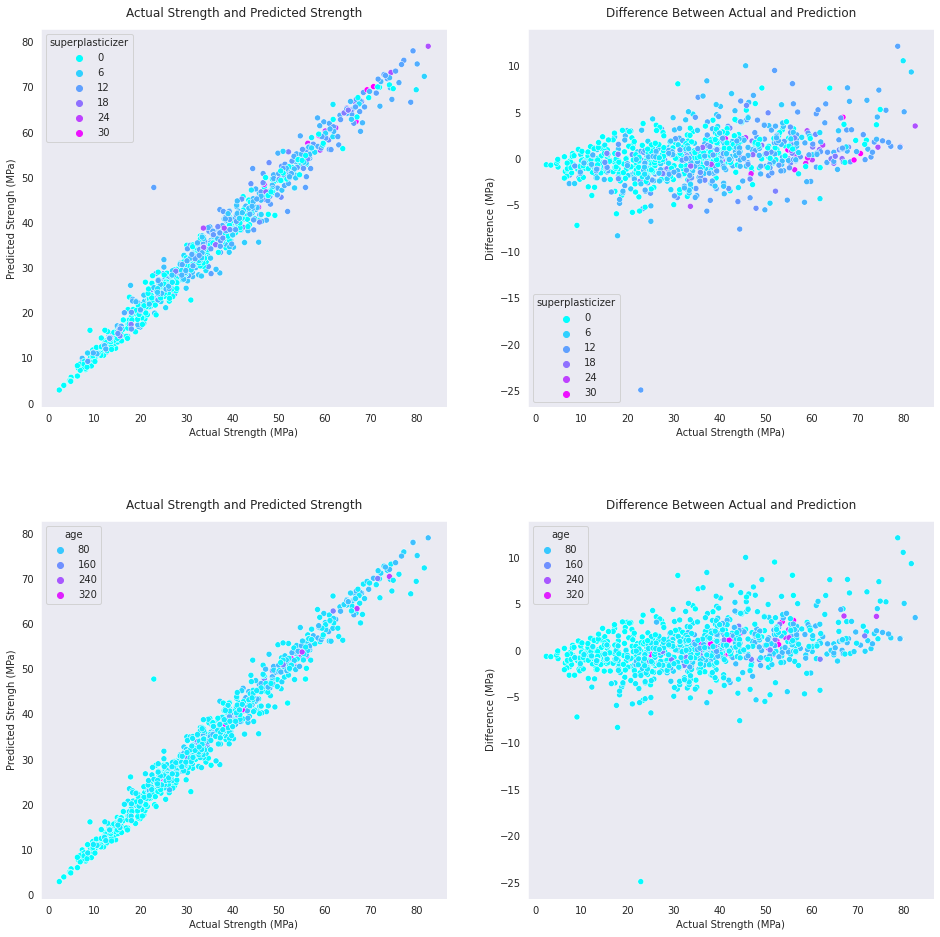

In [23]:
hue_columns = ["superplasticizer", "age"]
actual_prediction_comparison(final_df,
                             "concrete_strength",
                             "predicted_strength",
                             hue_columns)